In [61]:
import read_sdc
import glob
import os
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
directory = "IrRu0919/ECSA/repeat low scan"
file_list = glob.glob(f'{directory}/* - *.ucv') # Dodges the ESCC.ucv looking files

directories = ["IrRu-5/ecsa",
               "IrRu-5/ecsa/line_1k_new",
               "IrRu-5/ecsa/line_3k_new",
               "IrRu-5/ecsa/line_5k_new",
              ]

print("\n".join(file_list[:4]))

IrRu0919/ECSA/repeat low scan/ECSA - L2-1.ucv
IrRu0919/ECSA/repeat low scan/ECSA - L2-103.ucv
IrRu0919/ECSA/repeat low scan/ECSA - L2-107.ucv
IrRu0919/ECSA/repeat low scan/ECSA - L2-111.ucv


Word of warning: os.path.getctime() fails to get correct ctime (at least on Jacob's end)--instead, it grabs when I created the file from the .zip on my computer.

Thus, we need to use our own sorting scheme based on file naming conventions

In [54]:
# NOTE: This sorting and organization scheme will work AS LONG AS EXPERIMENTS ARE DONE AS TRIPLETS
#       Changing this will require an alternate organization scheme.

# Sort
def ucv_number_extractor(file_path):
    split_file = file_path \
                    .split("-")[-1] \
                    .split(".")[0]
    return int(split_file)

file_list = sorted(file_list, key=lambda x:ucv_number_extractor(x))
experiment_arr = [] # Will hold tuples of individual experiments
for ii in np.arange(0,len(file_list),3):
    try:
        experiment = (file_list[ii],file_list[ii+1],file_list[ii+2])
        experiment_arr.append(experiment)
    except:
        print(f'Unmatched experiment for {ii}')
#experiment_arr = [(file_list[ii],file_list[ii+1],file_list[ii+2]) for ii in np.arange(0,len(file_list),3)]
experiment_arr[:3]
for experiment in experiment_arr:
    print(experiment)

Unmatched experiment for 624
('IrRu0919/ECSA/repeat low scan/ECSA - L2-1.ucv', 'IrRu0919/ECSA/repeat low scan/ECSB - L2-2.ucv', 'IrRu0919/ECSA/repeat low scan/ECSC - L2-3.ucv')
('IrRu0919/ECSA/repeat low scan/ECSA - L2-5.ucv', 'IrRu0919/ECSA/repeat low scan/ECSB - L2-6.ucv', 'IrRu0919/ECSA/repeat low scan/ECSC - L2-7.ucv')
('IrRu0919/ECSA/repeat low scan/ECSA - L2-9.ucv', 'IrRu0919/ECSA/repeat low scan/ECSB - L2-10.ucv', 'IrRu0919/ECSA/repeat low scan/ECSC - L2-11.ucv')
('IrRu0919/ECSA/repeat low scan/ECSA - L2-13.ucv', 'IrRu0919/ECSA/repeat low scan/ECSB - L2-14.ucv', 'IrRu0919/ECSA/repeat low scan/ECSC - L2-15.ucv')
('IrRu0919/ECSA/repeat low scan/ECSA - L2-17.ucv', 'IrRu0919/ECSA/repeat low scan/ECSB - L2-18.ucv', 'IrRu0919/ECSA/repeat low scan/ECSC - L2-19.ucv')
('IrRu0919/ECSA/repeat low scan/ECSA - L2-21.ucv', 'IrRu0919/ECSA/repeat low scan/ECSB - L2-22.ucv', 'IrRu0919/ECSA/repeat low scan/ECSC - L2-23.ucv')
('IrRu0919/ECSA/repeat low scan/ECSA - L2-25.ucv', 'IrRu0919/ECSA/repeat

In [69]:
total_files_list = []

def ucv_number_extractor(file_path):
    split_file = file_path \
                    .split("-")[-1] \
                    .split(".")[0]
    return int(split_file)

experiment_arr = []
error_coutner = 0
for directory in directories:
    file_list = glob.glob(f'{directory}/* - *.ucv')
    file_list = sorted(file_list, key=lambda x:ucv_number_extractor(x))
    for ii in np.arange(0,len(file_list),3):
        try:
            experiment_ID = file_list[ii]
            if not "5k" in experiment_ID:
                experiment = (file_list[ii],file_list[ii+1],file_list[ii+2])
                experiment_arr.append(experiment)
            else:
                experiment = (file_list[ii+2],file_list[ii+1],file_list[ii])
                experiment_arr.append(experiment)
        except:
            print(f'Unmatched experiment for {ii}')
            error_counter += 1

print(error_counter)
for experiment in experiment_arr:
    print(experiment)

Unmatched experiment for 81
Unmatched experiment for 114
5
('IrRu-5/ecsa/ECSA - L2-1.ucv', 'IrRu-5/ecsa/ECSB - L2-2.ucv', 'IrRu-5/ecsa/ECSC - L2-3.ucv')
('IrRu-5/ecsa/ECSA - L2-5.ucv', 'IrRu-5/ecsa/ECSB - L2-6.ucv', 'IrRu-5/ecsa/ECSC - L2-7.ucv')
('IrRu-5/ecsa/ECSA - L2-9.ucv', 'IrRu-5/ecsa/ECSB - L2-10.ucv', 'IrRu-5/ecsa/ECSC - L2-11.ucv')
('IrRu-5/ecsa/ECSA - L2-13.ucv', 'IrRu-5/ecsa/ECSB - L2-14.ucv', 'IrRu-5/ecsa/ECSC - L2-15.ucv')
('IrRu-5/ecsa/ECSA - L2-17.ucv', 'IrRu-5/ecsa/ECSB - L2-18.ucv', 'IrRu-5/ecsa/ECSC - L2-19.ucv')
('IrRu-5/ecsa/ECSA - L2-21.ucv', 'IrRu-5/ecsa/ECSB - L2-22.ucv', 'IrRu-5/ecsa/ECSC - L2-23.ucv')
('IrRu-5/ecsa/ECSA - L2-25.ucv', 'IrRu-5/ecsa/ECSB - L2-26.ucv', 'IrRu-5/ecsa/ECSC - L2-27.ucv')
('IrRu-5/ecsa/ECSA - L2-29.ucv', 'IrRu-5/ecsa/ECSB - L2-30.ucv', 'IrRu-5/ecsa/ECSC - L2-31.ucv')
('IrRu-5/ecsa/ECSA - L2-33.ucv', 'IrRu-5/ecsa/ECSB - L2-34.ucv', 'IrRu-5/ecsa/ECSC - L2-35.ucv')
('IrRu-5/ecsa/ECSA - L2-37.ucv', 'IrRu-5/ecsa/ECSB - L2-38.ucv', 'IrRu-5/ec

In [6]:
def get_cv_values(file_path):
    print(f'Reading {file_path}...')
    total_data = read_sdc.read_ulv(file_path)
    #print(total_data["DataTitle0"])
    #print(total_data["DataTitle1"])
    #print(total_data["DataTitle2"])
    seconds_arr = total_data["Data0"]
    volts_arr = total_data["Data1"]
    amps_arr = total_data["Data2"]
    return seconds_arr,volts_arr,amps_arr

Reading IrRu0919/ECSA/repeat low scan/4500re/ECSA - L2-5.ucv...
Reading IrRu0919/ECSA/repeat low scan/4500re/ECSB - L2-6.ucv...
Reading IrRu0919/ECSA/repeat low scan/4500re/ECSC - L2-7.ucv...


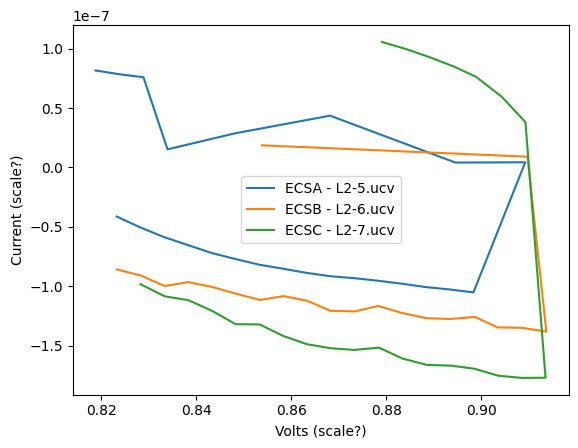

In [36]:
for p in experiment_arr[1]:
    _, volts_arr, amps_arr = get_cv_values(p)
    plt.plot(volts_arr,amps_arr,label=p.split("/")[-1])

plt.xlabel("Volts (scale?)")
plt.ylabel("Current (scale?)")
plt.legend()


Need scheme for approximating corners of each graph. Corners will occur at the extrema-extrema ({max/min} current, {max/min} volts), so maybe the best overall scheme for IDing corners is to check curvature of graph and then grab the most curved points?

Of course, there may be sudden jumps in graph (see triangle in ESCC above) that may compete...

Reading IrRu0919/ECSA/repeat low scan/ECSC - L2-7.ucv...
0.9136185646057129 0.8135833144187927


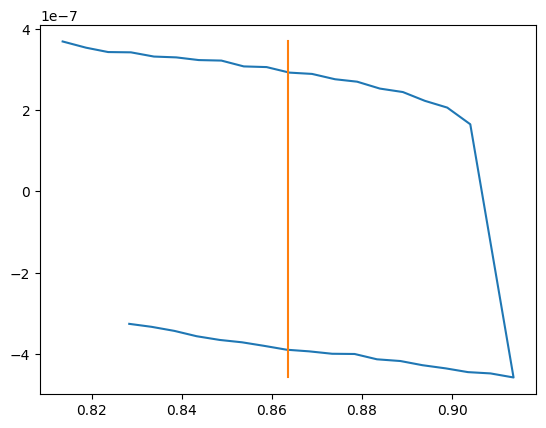

In [8]:
# Testing thought-process: Simple edge scheme
# IF the graph is presumed symmetric and liek a parallelogram, then simply getting the middle of the entire x-range is
# Sufficient for finding the middle value
def simple_central_value(x_arr):
    return ((max(volts_arr)+min(volts_arr))/2)

_, volts_arr, amps_arr = get_cv_values(experiment_arr[1][2])
plt.plot(volts_arr,amps_arr,label=p.split("/")[-1])
print(max(volts_arr),min(volts_arr))

middle = simple_central_value(volts_arr)
plt.plot([middle,middle],[min(amps_arr),max(amps_arr)])

#### Presumed Quadrant Method
If we assume that the graph must look like a parallelogram, then we should be able to grab each corner by defining quadrants in a normalized x-y plot.

This will fail under certain conditions, like if the data fails to ever cross a certain quadrant (which occurs IF the graph is heavily assymmetric)

[-0.704595030843472, -0.6058399118638775, -0.5045095879016608, -0.4057532772492378, -0.3031347549592954, -0.204379635979701, -0.1073417175461312, -0.006440395802213339, 0.09360172983227799, 0.1953634393584509, 0.29497656277464346, 0.3941606839725367, 0.4980685962630331, 0.595964519133201, 0.69944223753257, 0.7977671626210368, 0.8978104799283566, 1.0, 0.8080715575700124, 0.705882037498369, 0.6066979163004755, 0.5092321873214354, 0.40704147557696335, 0.3061401538330455, 0.20824423096287759, 0.1060547108912342, 0.006011393583914337, -0.09532012205113105, -0.19665163768617655, -0.29583456721124124, -0.3963068867368602, -0.49592120182588106, -0.5951053230237744, -0.6972948430954178, -0.7981973565121643, -0.8965222816006311, -1.0]
[-0.6808101452601028, -0.6984232969013249, -0.722650960325691, -0.754441770972822, -0.7765927421511666, -0.7906165721018144, -0.8115113185265529, -0.8347648229963155, -0.8445071693042514, -0.8588386573654208, -0.8601717966466573, -0.8918343705500466, -0.90206386513

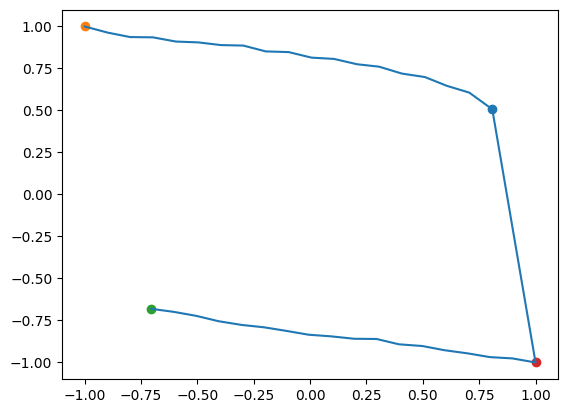

In [9]:
# Testing thought process: Presumed Quadrant Method
# Implementation: Assume that the graph will look like a parallelgram. Then, there must be one corner PER quadrant
#                 A given corner will be the point with largest L2-Norm from the center of the parallelogram
# CRITICAL DETAIL: Need to normalize axises, else volts scaling always wins

def presumed_quadrant_corners(x_arr,y_arr):
    x_norm = [2*(x-min(x_arr))/(max(x_arr)-min(x_arr))-1 for x in x_arr]
    y_norm = [2*(y-min(y_arr))/(max(y_arr)-min(y_arr))-1 for y in y_arr]
    print(x_norm)
    print(y_norm)
    
    def quadrant_setter(x_functor,y_functor):
         # hold ii for original index
        return [(x_norm[ii],y_norm[ii],ii) for ii in np.arange(len(x_arr)) \
                if x_functor(x_norm[ii]) and y_functor(y_norm[ii])]
    def L2_norm(quadrant):
        return sorted(quadrant, key=lambda x: x[0]**2 + x[1]**2)[-1]
    
    gt_0 = lambda x: x>0
    lt_0 = lambda x: x<0
    #Q1= [(x_norm[ii],y_norm[ii]) for ii in np.arange(len(x_arr)) if x_norm[ii]>0 and y_norm[ii]>0]
    Q1 = quadrant_setter(gt_0,gt_0)
    Q1_corner = L2_norm(Q1)
    Q2 = quadrant_setter(lt_0,gt_0)
    Q2_corner = L2_norm(Q2)
    Q3 = quadrant_setter(lt_0,lt_0)
    Q3_corner = L2_norm(Q3)
    Q4 = quadrant_setter(gt_0,lt_0)
    Q4_corner = L2_norm(Q4)
    print(Q1_corner)
    plt.scatter(Q1_corner[0],Q1_corner[1])
    plt.scatter(Q2_corner[0],Q2_corner[1])
    plt.scatter(Q3_corner[0],Q3_corner[1])
    plt.scatter(Q4_corner[0],Q4_corner[1])
    plt.plot(x_norm,y_norm) # For debugging

presumed_quadrant_corners(volts_arr,amps_arr)
plt.show()

#### Data Plotting and info extraction
Using the simple scheme (since quadrant fails w/ certain data types), we now need to get meaningful data out. This is where the bisecting middle line crosses through the top and bottom of the graph and taking the abs(...) average (since it should be symmetric).

NOTE TO SELF: Possible alternate scheme could be doing a linear plot between defined corners w/ quadrant (but this could fail in the circumstance where we DON'T have well defined quadrants

In [17]:
def get_weighed_max_current(volts_arr,amps_arr,nearest_neighbors=4):
    # Nearest neighbors (int) : allows us to define a larger average range
    # Returns: 
    # avg_value (float) : Average current of all nn 
    # nn (list[tuple]) : All points used in calculation used (for plot checking)
    # middle_volts (float) : Central value (used for plot checking)
    middle_volts = simple_central_value(volts_arr)
    va_zipped = zip(volts_arr,amps_arr)
    va_zipped = sorted(va_zipped,key=lambda x: np.abs(x[0]-middle_volts)) # Points closest top AND bottom
    nn_amps = [np.abs(va_zipped[ii][1]) for ii in np.arange(nearest_neighbors)]
    return np.sum(nn_amps)/nearest_neighbors, va_zipped[:nearest_neighbors], middle_volts
    
avg, nn, mid_volts = get_weighed_max_current(volts_arr,amps_arr,6)
plt.plot(volts_arr,amps_arr)
for point in nn:
    plt.scatter(point[0],point[1])
plt.plot([mid_volts,mid_volts],[min(amps_arr),max(amps_arr)],alpha=.2)

IndexError: list index out of range

#### For an entire experiment set
We need to now use get_weighed_max_current for an entire experiment set. This should be easy with current set-up!

Reading IrRu0919/ECSA/repeat low scan/4500re/ECSA - L2-17.ucv...
Reading IrRu0919/ECSA/repeat low scan/4500re/ECSB - L2-18.ucv...
Reading IrRu0919/ECSA/repeat low scan/4500re/ECSC - L2-19.ucv...


Text(0, 0.5, 'Current (A)')

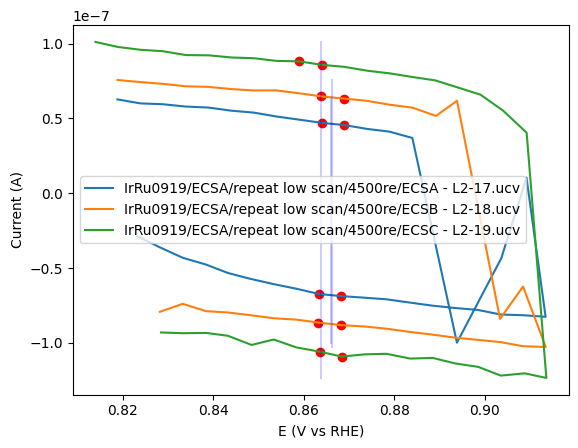

In [37]:
test_experiment = experiment_arr[4]

avg_val_arr = []
for run in test_experiment:
    _,volts_arr,amps_arr = get_cv_values(run)
    avg_val, nn, mid_volts = get_weighed_max_current(volts_arr,amps_arr)
    plt.plot(volts_arr,amps_arr,label=run)
    for point in nn:
        plt.scatter(point[0],point[1],c="r")
    plt.plot([mid_volts,mid_volts],[min(amps_arr),max(amps_arr)],"b",alpha=.2)

    avg_val_arr.append(avg_val)
plt.legend()
plt.xlabel("E (V vs RHE)")
plt.ylabel("Current (A)")


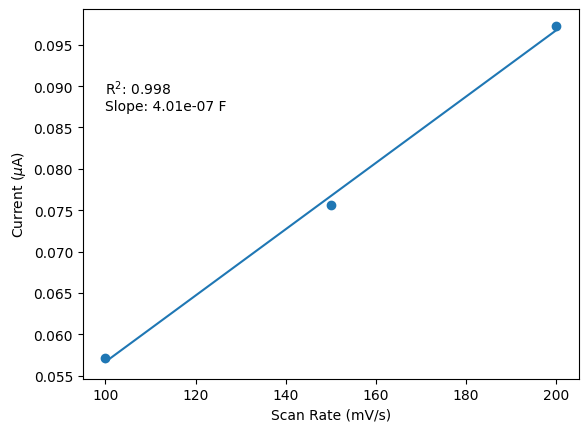

4.010250531649721e-10


In [65]:
# Note: need to scale by units
# HUGE NOTE: there has to be a smarter way of plotting with units, jesus
scan_arr = [100,150,200]
scan_arr = np.array(scan_arr)
avg_val_arr = np.array(avg_val_arr)
m,x = np.polyfit(scan_arr,avg_val_arr,1)
plt.scatter(scan_arr,avg_val_arr*10**6)
fitted_data = m*scan_arr+x #[m*scan+x for scan in scan_arr]
plt.plot(scan_arr,fitted_data*10**6)
plt.xlabel("Scan Rate (mV/s)")
plt.ylabel("Current ($\mu$A)")

def R2(actual_data,fitted_data):
    actual_data = np.array(actual_data)
    fitted_data = np.array(fitted_data)
    numerator = sum((actual_data-fitted_data)**2)
    denominator = sum((actual_data-np.mean(actual_data))**2)
    #print(actual_data-fitted_data)
    #print(np.mean(actual_data))
    #print(numerator,denominator)
    return 1-numerator/denominator

r2 = R2(avg_val_arr,fitted_data)
plt.text(100,max(fitted_data*10**6)*.9,f'R$^2$: {r2:.4}\nSlope: {10**3*m:.4} F')
plt.show()

print(m)

We have now demonstrated this works for individual experiment sets. To ease future use, let's put this all in a single DataFrame for every experiment set!

In [70]:
import pandas as pd


debug_run = None
# NOTE TO SELF (2022.09.26): Provide Array Data so Jin can use Origin
# Need columns "Experiments" "ECSA" "ECSB" "ECSC" "Slope" "Intercept" "R2"
df = pd.DataFrame(columns=['Experiments',\
                           '100 mV/s Current (A)',\
                           '150 mV/s Current (A)',\
                           '200 mV/s Current (A)',\
                           '100 mV/s Data ((V,A))',\
                           '150 mV/s Data ((V,A))',\
                           '200 mV/s Data ((V,A))',\
                           'Slope (F)',
                           'Intercept (F)',
                           'R2'])
print(df)
error_counter = 0
for experiment in experiment_arr[:]:
    
    avg_current_val_arr = []
    data_combined_arr = []
    print(avg_current_val_arr)
    try:
        for run in experiment:
            debug_run = run
            _,volts_arr,amps_arr = get_cv_values(run)
            avg_val, nn, mid_volts = get_weighed_max_current(volts_arr,amps_arr)
            #plt.plot(volts_arr,amps_arr,label=run)
            #for point in nn:
            #    plt.scatter(point[0],point[1],c="r")
            #plt.plot([mid_volts,mid_volts],[min(amps_arr),max(amps_arr)],"b",alpha=.2)

            avg_current_val_arr.append(avg_val)

            combined_data = list(zip(volts_arr,amps_arr))
            data_combined_arr.append(combined_data)

        scan_arr = [100,150,200]
        m,x = np.polyfit(scan_arr,avg_current_val_arr,1)
        fitted_current_arr = [m*scan+x for scan in scan_arr]
        r2 = R2(avg_current_val_arr,fitted_current_arr)

        new_data = pd.DataFrame({'Experiments':[experiment],
                      '100 mV/s Current (A)':avg_current_val_arr[0],
                     '150 mV/s Current (A)':avg_current_val_arr[1],
                     '200 mV/s Current (A)':avg_current_val_arr[2],
                     '100 mV/s Data ((V,A))':[data_combined_arr[0]],
                     '150 mV/s Data ((V,A))':[data_combined_arr[1]],
                     '200 mV/s Data ((V,A))':[data_combined_arr[2]],
                     'Slope (F)':m,
                     'Intercept (F)':x,
                     'R2':r2})
        df = pd.concat([df,new_data])
    except:
        print(f'Error with {experiment}, continuing...')
        error_counter += 1
print(error_counter)

Empty DataFrame
Columns: [Experiments, 100 mV/s Current (A), 150 mV/s Current (A), 200 mV/s Current (A), 100 mV/s Data ((V,A)), 150 mV/s Data ((V,A)), 200 mV/s Data ((V,A)), Slope (F), Intercept (F), R2]
Index: []
[]
Reading IrRu-5/ecsa/ECSA - L2-1.ucv...
Reading IrRu-5/ecsa/ECSB - L2-2.ucv...
Reading IrRu-5/ecsa/ECSC - L2-3.ucv...
[]
Reading IrRu-5/ecsa/ECSA - L2-5.ucv...
Reading IrRu-5/ecsa/ECSB - L2-6.ucv...
Reading IrRu-5/ecsa/ECSC - L2-7.ucv...
[]
Reading IrRu-5/ecsa/ECSA - L2-9.ucv...
Reading IrRu-5/ecsa/ECSB - L2-10.ucv...
Reading IrRu-5/ecsa/ECSC - L2-11.ucv...
[]
Reading IrRu-5/ecsa/ECSA - L2-13.ucv...
Reading IrRu-5/ecsa/ECSB - L2-14.ucv...
Reading IrRu-5/ecsa/ECSC - L2-15.ucv...
[]
Reading IrRu-5/ecsa/ECSA - L2-17.ucv...
Reading IrRu-5/ecsa/ECSB - L2-18.ucv...
Reading IrRu-5/ecsa/ECSC - L2-19.ucv...
[]
Reading IrRu-5/ecsa/ECSA - L2-21.ucv...
Reading IrRu-5/ecsa/ECSB - L2-22.ucv...
Reading IrRu-5/ecsa/ECSC - L2-23.ucv...
[]
Reading IrRu-5/ecsa/ECSA - L2-25.ucv...
Reading IrRu

[]
Reading IrRu-5/ecsa/line_3k_new/ECSA - L2-17.ucv...
Reading IrRu-5/ecsa/line_3k_new/ECSB - L2-18.ucv...
Reading IrRu-5/ecsa/line_3k_new/ECSC - L2-19.ucv...
[]
Reading IrRu-5/ecsa/line_3k_new/ECSA - L2-21.ucv...
Reading IrRu-5/ecsa/line_3k_new/ECSB - L2-22.ucv...
Reading IrRu-5/ecsa/line_3k_new/ECSC - L2-23.ucv...
[]
Reading IrRu-5/ecsa/line_3k_new/ECSA - L2-25.ucv...
Reading IrRu-5/ecsa/line_3k_new/ECSB - L2-26.ucv...
Reading IrRu-5/ecsa/line_3k_new/ECSC - L2-27.ucv...
[]
Reading IrRu-5/ecsa/line_3k_new/ECSA - L2-29.ucv...
Reading IrRu-5/ecsa/line_3k_new/ECSB - L2-30.ucv...
Reading IrRu-5/ecsa/line_3k_new/ECSC - L2-31.ucv...
[]
Reading IrRu-5/ecsa/line_3k_new/ECSA - L2-33.ucv...
Reading IrRu-5/ecsa/line_3k_new/ECSB - L2-34.ucv...
Reading IrRu-5/ecsa/line_3k_new/ECSC - L2-35.ucv...
[]
Reading IrRu-5/ecsa/line_3k_new/ECSA - L2-37.ucv...
Reading IrRu-5/ecsa/line_3k_new/ECSB - L2-38.ucv...
Reading IrRu-5/ecsa/line_3k_new/ECSC - L2-39.ucv...
[]
Reading IrRu-5/ecsa/line_3k_new/ECSA - L2-4

Reading IrRu-5/ecsa/line_5k_new/ECSA - L2-115.ucv...
[]
Reading IrRu-5/ecsa/line_5k_new/ECSC - L2-121.ucv...
Reading IrRu-5/ecsa/line_5k_new/ECSB - L2-120.ucv...
Reading IrRu-5/ecsa/line_5k_new/ECSA - L2-119.ucv...
[]
Reading IrRu-5/ecsa/line_5k_new/ECSC - L2-127.ucv...
Reading IrRu-5/ecsa/line_5k_new/ECSB - L2-126.ucv...
Reading IrRu-5/ecsa/line_5k_new/ECSA - L2-125.ucv...
[]
Reading IrRu-5/ecsa/line_5k_new/ECSC - L2-131.ucv...
Reading IrRu-5/ecsa/line_5k_new/ECSB - L2-130.ucv...
Reading IrRu-5/ecsa/line_5k_new/ECSA - L2-129.ucv...
[]
Reading IrRu-5/ecsa/line_5k_new/ECSC - L2-135.ucv...
Reading IrRu-5/ecsa/line_5k_new/ECSB - L2-134.ucv...
Reading IrRu-5/ecsa/line_5k_new/ECSA - L2-133.ucv...
[]
Reading IrRu-5/ecsa/line_5k_new/ECSC - L2-139.ucv...
Reading IrRu-5/ecsa/line_5k_new/ECSB - L2-138.ucv...
Reading IrRu-5/ecsa/line_5k_new/ECSA - L2-137.ucv...
[]
Reading IrRu-5/ecsa/line_5k_new/ECSC - L2-143.ucv...
Reading IrRu-5/ecsa/line_5k_new/ECSB - L2-142.ucv...
Reading IrRu-5/ecsa/line_5k_

Reading IrRu-5/ecsa/line_5k_new/ECSB - L2-360.ucv...
Reading IrRu-5/ecsa/line_5k_new/ECSA - L2-359.ucv...
[]
Reading IrRu-5/ecsa/line_5k_new/ECSC - L2-365.ucv...
Reading IrRu-5/ecsa/line_5k_new/ECSB - L2-364.ucv...
Reading IrRu-5/ecsa/line_5k_new/ECSA - L2-363.ucv...
[]
Reading IrRu-5/ecsa/line_5k_new/ECSC - L2-369.ucv...
Reading IrRu-5/ecsa/line_5k_new/ECSB - L2-368.ucv...
Reading IrRu-5/ecsa/line_5k_new/ECSA - L2-367.ucv...
[]
Reading IrRu-5/ecsa/line_5k_new/ECSC - L2-375.ucv...
Reading IrRu-5/ecsa/line_5k_new/ECSB - L2-374.ucv...
Reading IrRu-5/ecsa/line_5k_new/ECSA - L2-373.ucv...
[]
Reading IrRu-5/ecsa/line_5k_new/ECSC - L2-379.ucv...
Reading IrRu-5/ecsa/line_5k_new/ECSB - L2-378.ucv...
Reading IrRu-5/ecsa/line_5k_new/ECSA - L2-377.ucv...
[]
Reading IrRu-5/ecsa/line_5k_new/ECSC - L2-383.ucv...
Reading IrRu-5/ecsa/line_5k_new/ECSB - L2-382.ucv...
Reading IrRu-5/ecsa/line_5k_new/ECSA - L2-381.ucv...
[]
Reading IrRu-5/ecsa/line_5k_new/ECSC - L2-387.ucv...
Reading IrRu-5/ecsa/line_5k_

Reading IrRu-5/ecsa/line_5k_new/ECSA - L2-629.ucv...
[]
Reading IrRu-5/ecsa/line_5k_new/ECSC - L2-635.ucv...
Reading IrRu-5/ecsa/line_5k_new/ECSB - L2-634.ucv...
Reading IrRu-5/ecsa/line_5k_new/ECSA - L2-633.ucv...
[]
Reading IrRu-5/ecsa/line_5k_new/ECSC - L2-639.ucv...
Reading IrRu-5/ecsa/line_5k_new/ECSB - L2-638.ucv...
Reading IrRu-5/ecsa/line_5k_new/ECSA - L2-637.ucv...
[]
Reading IrRu-5/ecsa/line_5k_new/ECSC - L2-643.ucv...
Reading IrRu-5/ecsa/line_5k_new/ECSB - L2-642.ucv...
Reading IrRu-5/ecsa/line_5k_new/ECSA - L2-641.ucv...
[]
Reading IrRu-5/ecsa/line_5k_new/ECSC - L2-647.ucv...
Reading IrRu-5/ecsa/line_5k_new/ECSB - L2-646.ucv...
Reading IrRu-5/ecsa/line_5k_new/ECSA - L2-645.ucv...
[]
Reading IrRu-5/ecsa/line_5k_new/ECSC - L2-651.ucv...
Reading IrRu-5/ecsa/line_5k_new/ECSB - L2-650.ucv...
Reading IrRu-5/ecsa/line_5k_new/ECSA - L2-649.ucv...
[]
Reading IrRu-5/ecsa/line_5k_new/ECSC - L2-655.ucv...
Reading IrRu-5/ecsa/line_5k_new/ECSB - L2-654.ucv...
Reading IrRu-5/ecsa/line_5k_

In [71]:
df.to_csv("Jin_ECS_Data_RuIr-5.csv")


KeyError: '500 mV/s Data ((V,A))'

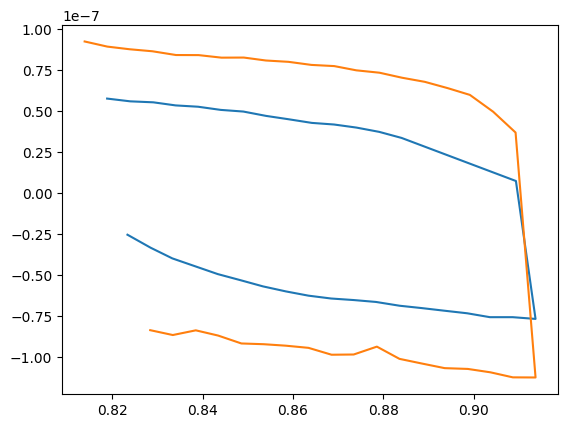

In [47]:
df.iloc[39]
data = df.iloc[19]

for ii in [1,2,5]:
    ECSA = data[f'{ii}00 mV/s Data ((V,A))']
    x_val = [data[0] for data in ECSA]
    y_val = [data[1] for data in ECSA]
    plt.plot(x_val,y_val)

In [68]:
len(df[df["R2"] < .95])

98

In [ ]:
read_sdc.read_ulv(debug_run)

In [ ]:
for item,val in total_data.items():
    print(f'{item} : {val}')